In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mutual_info_score
# from sklearn.feature_extraction import DictVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# from scipy.stats import ttest_ind

import spacy

In [2]:
df = pd.read_csv('../data/raw/engagements.csv')
df.head()

,timestamp,media_id,media_caption,comment_text
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it
3,2025-03-01 00:41:59.467000+00:00,1098364052333950,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...
4,2025-03-01 02:21:29.715000+00:00,1083943630442659,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️


In [3]:
media_caption_nulls = df['media_caption'].isnull().sum()
comment_text_nulls = df['comment_text'].isnull().sum()

print(f"Number of null/missing values in media_caption: {media_caption_nulls}")
print(f"Number of null/missing values in comment_text: {comment_text_nulls}")


Number of null/missing values in media_caption: 11
Number of null/missing values in comment_text: 29


In [4]:
df = df.dropna().reset_index(drop=True)


In [5]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.4 MB/s  0:00:03m 3.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
nlp = spacy.load('en_core_web_sm')

In [7]:
def extract_pos_tags(text, nlp_model):
    """
    Extract parts of speech tags from text using spaCy.
    Returns a list of (token, pos_tag) tuples.
    """
    if pd.isna(text) or text == '':
        return []
    
    doc = nlp_model(str(text))
    return [(token.text, token.pos_) for token in doc if not token.is_space]

# Test the function on a sample
sample_text = "Soft skin, soft life 🩷🌸🫧 get your hands on this self-care gem!"
sample_pos = extract_pos_tags(sample_text, nlp)
print("Sample POS tags:")
for token, pos in sample_pos:
    print(f"{token}: {pos}")


Sample POS tags:
Soft: ADJ
skin: NOUN
,: PUNCT
soft: ADJ
life: NOUN
🩷: SYM
🌸: NOUN
🫧: VERB
get: VERB
your: PRON
hands: NOUN
on: ADP
this: DET
self: NOUN
-: PUNCT
care: NOUN
gem: NOUN
!: PUNCT


In [8]:
# Apply POS tagging to media_caption column
print("Applying POS tagging to media_caption column...")
df['media_caption_pos'] = df['media_caption'].apply(lambda x: extract_pos_tags(x, nlp))

# Show sample results
print("\nSample media_caption POS tags:")
for i in range(3):
    if not df['media_caption_pos'].iloc[i]:
        print(f"Row {i}: No text or empty")
    else:
        print(f"Row {i}: {df['media_caption_pos'].iloc[i][:10]}...")  # Show first 10 tags


Applying POS tagging to media_caption column...

Sample media_caption POS tags:
Row 0: [('Soft', 'ADJ'), ('skin', 'NOUN'), (',', 'PUNCT'), ('soft', 'ADJ'), ('life', 'NOUN'), ('🩷', 'SYM'), ('🌸', 'NOUN'), ('🫧', 'VERB'), ('get', 'VERB'), ('your', 'PRON')]...
Row 1: [('Why', 'SCONJ'), ('use', 'VERB'), ('one', 'NUM'), ('scrub', 'NOUN'), ('when', 'SCONJ'), ('you', 'PRON'), ('can', 'AUX'), ('use', 'VERB'), ('them', 'PRON'), ('all', 'PRON')]...
Row 2: [('Morning', 'PROPN'), ('routine', 'NOUN'), ('with', 'ADP'), ('Tree', 'PROPN'), ('Hut', 'PROPN'), ('🍊', 'PROPN'), ('🫧', 'VERB'), ('Now', 'ADV'), ('available', 'ADJ'), ('online', 'ADJ')]...


In [9]:
# Apply POS tagging to comment_text column
print("Applying POS tagging to comment_text column...")
df['comment_text_pos'] = df['comment_text'].apply(lambda x: extract_pos_tags(x, nlp))

# Show sample results
print("\nSample comment_text POS tags:")
for i in range(3):
    if not df['comment_text_pos'].iloc[i]:
        print(f"Row {i}: No text or empty")
    else:
        print(f"Row {i}: {df['comment_text_pos'].iloc[i][:10]}...")  # Show first 10 tags


Applying POS tagging to comment_text column...

Sample comment_text POS tags:
Row 0: [('I', 'PRON'), ('bet', 'VERB'), ('this', 'PRON'), ('is', 'AUX'), ('good', 'ADJ')]...
Row 1: [('i', 'PRON'), ('know', 'VERB'), ('this', 'PRON'), ('smells', 'VERB'), ('so', 'ADV'), ('good', 'ADJ')]...
Row 2: [('Love', 'VERB'), ('it', 'PRON')]...


In [10]:
# Create summary statistics for POS tags
from collections import Counter

def get_pos_summary(pos_list):
    """Get POS tag frequency summary from a list of POS tag lists"""
    all_pos = []
    for pos_tags in pos_list:
        if pos_tags:  # Skip empty lists
            all_pos.extend([pos for token, pos in pos_tags])
    return Counter(all_pos)

# Get POS summaries for both columns
media_caption_pos_summary = get_pos_summary(df['media_caption_pos'])
comment_text_pos_summary = get_pos_summary(df['comment_text_pos'])

print("POS Tag Summary for Media Captions:")
print("=" * 40)
for pos, count in media_caption_pos_summary.most_common(10):
    print(f"{pos}: {count}")

print("\nPOS Tag Summary for Comment Text:")
print("=" * 40)
for pos, count in comment_text_pos_summary.most_common(10):
    print(f"{pos}: {count}")

# Create a comparison DataFrame
pos_comparison = pd.DataFrame({
    'Media_Caption_Count': [media_caption_pos_summary[pos] for pos in set(media_caption_pos_summary.keys()) | set(comment_text_pos_summary.keys())],
    'Comment_Text_Count': [comment_text_pos_summary[pos] for pos in set(media_caption_pos_summary.keys()) | set(comment_text_pos_summary.keys())]
}, index=list(set(media_caption_pos_summary.keys()) | set(comment_text_pos_summary.keys())))

pos_comparison = pos_comparison.fillna(0).astype(int)
pos_comparison = pos_comparison.sort_values('Media_Caption_Count', ascending=False)

print("\nPOS Tag Comparison (Top 15):")
print("=" * 50)
print(pos_comparison.head(15))


POS Tag Summary for Media Captions:
NOUN: 264716
PROPN: 196433
PUNCT: 179868
VERB: 162598
ADP: 120118
PRON: 98543
DET: 79486
AUX: 72324
ADJ: 70985
NUM: 59218

POS Tag Summary for Comment Text:
PROPN: 20002
NOUN: 15617
PUNCT: 12781
VERB: 8676
PRON: 7891
ADJ: 3476
ADV: 3176
AUX: 3056
X: 3008
DET: 2629

POS Tag Comparison (Top 15):
       Media_Caption_Count  Comment_Text_Count
NOUN                264716               15617
PROPN               196433               20002
PUNCT               179868               12781
VERB                162598                8676
ADP                 120118                2475
PRON                 98543                7891
DET                  79486                2629
AUX                  72324                3056
ADJ                  70985                3476
NUM                  59218                2577
SYM                  36374                 473
ADV                  32906                3176
CCONJ                26923                1162
PART       

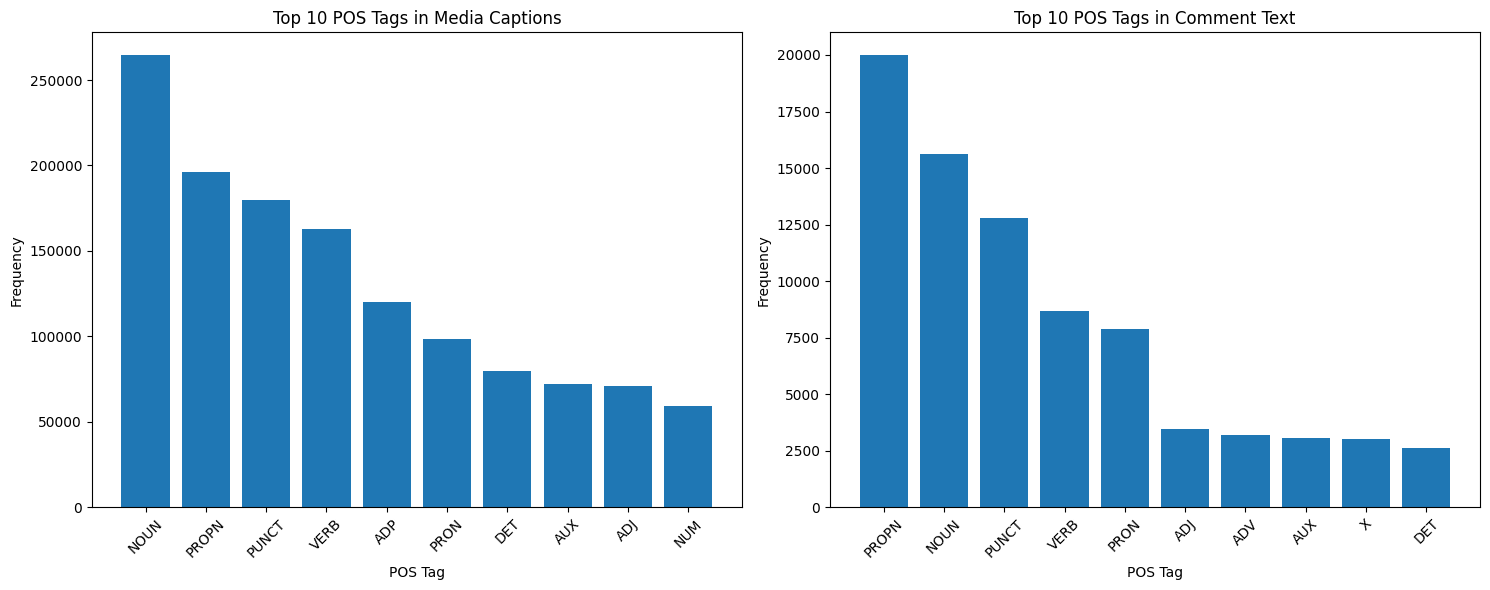


Total unique POS tags in media captions: 17
Total unique POS tags in comment text: 17
Total tokens processed in media captions: 1442100
Total tokens processed in comment text: 89749


In [11]:
# Visualize POS tag distribution
import matplotlib.pyplot as plt

# Create subplots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Media caption POS tags (top 10)
media_top10 = dict(media_caption_pos_summary.most_common(10))
ax1.bar(media_top10.keys(), media_top10.values())
ax1.set_title('Top 10 POS Tags in Media Captions')
ax1.set_xlabel('POS Tag')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', rotation=45)

# Comment text POS tags (top 10)
comment_top10 = dict(comment_text_pos_summary.most_common(10))
ax2.bar(comment_top10.keys(), comment_top10.values())
ax2.set_title('Top 10 POS Tags in Comment Text')
ax2.set_xlabel('POS Tag')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Show some interesting statistics
print(f"\nTotal unique POS tags in media captions: {len(media_caption_pos_summary)}")
print(f"Total unique POS tags in comment text: {len(comment_text_pos_summary)}")
print(f"Total tokens processed in media captions: {sum(media_caption_pos_summary.values())}")
print(f"Total tokens processed in comment text: {sum(comment_text_pos_summary.values())}")


In [12]:
# Named Entity Recognizer Function
def named_entity_recognizer(doc):
    
    words = list()
    named_entities = list()
    
    for ent in doc.ents:
        words.append(ent.text)
        named_entities.append(ent.label_)
        
    df = pd.DataFrame({"Word" : words,
                      "Named Entity" : named_entities})
    print(df)

In [13]:
# Named Entity Recognition for Media Captions
print("=" * 60)
print("NAMED ENTITY RECOGNITION - MEDIA CAPTIONS")
print("=" * 60)

# Apply NER to media captions
print("Processing media captions for named entities...")
media_caption_entities = []

for i, caption in enumerate(df['media_caption']):
    if pd.notna(caption) and caption.strip():
        doc = nlp(str(caption))
        entities = []
        for ent in doc.ents:
            entities.append((ent.text, ent.label_))
        media_caption_entities.append(entities)
    else:
        media_caption_entities.append([])
    
    # Show progress for first few examples
    if i < 5 and media_caption_entities[i]:
        print(f"\nExample {i+1}:")
        print(f"Text: {caption[:100]}...")
        print("Named Entities:")
        for entity, label in media_caption_entities[i]:
            print(f"  {entity}: {label}")

# Add to dataframe
df['media_caption_ner'] = media_caption_entities

print(f"\nProcessed {len(media_caption_entities)} media captions")
print(f"Captions with entities: {sum(1 for ents in media_caption_entities if ents)}")


NAMED ENTITY RECOGNITION - MEDIA CAPTIONS
Processing media captions for named entities...

Example 2:
Text: Why use one scrub when you can use them all at once 🤩

#treehut #treehutcollection #megascrub...
Named Entities:
  one: CARDINAL
  #: CARDINAL

Example 3:
Text: Morning routine with Tree Hut 🍊🫧 Now available online and in-store!...
Named Entities:
  Morning: TIME
  Tree Hut: ORG

Example 4:
Text: Why use one scrub when you can use them all at once 🤩...
Named Entities:
  one: CARDINAL

Example 5:
Text: Vanilla Serum-Infused Hand Wash: A sweet escape for dry hands....
Named Entities:
  Vanilla Serum-Infused Hand Wash: PERSON

Processed 17804 media captions
Captions with entities: 15826


In [14]:
# Named Entity Recognition for Comment Text
print("=" * 60)
print("NAMED ENTITY RECOGNITION - COMMENT TEXT")
print("=" * 60)

# Apply NER to comment text
print("Processing comment text for named entities...")
comment_text_entities = []

for i, comment in enumerate(df['comment_text']):
    if pd.notna(comment) and comment.strip():
        doc = nlp(str(comment))
        entities = []
        for ent in doc.ents:
            entities.append((ent.text, ent.label_))
        comment_text_entities.append(entities)
    else:
        comment_text_entities.append([])
    
    # Show progress for first few examples
    if i < 5 and comment_text_entities[i]:
        print(f"\nExample {i+1}:")
        print(f"Text: {comment[:100]}...")
        print("Named Entities:")
        for entity, label in comment_text_entities[i]:
            print(f"  {entity}: {label}")

# Add to dataframe
df['comment_text_ner'] = comment_text_entities

print(f"\nProcessed {len(comment_text_entities)} comments")
print(f"Comments with entities: {sum(1 for ents in comment_text_entities if ents)}")


NAMED ENTITY RECOGNITION - COMMENT TEXT
Processing comment text for named entities...

Example 4:
Text: Please carry these in Canada! I miss them so much!...
Named Entities:
  Canada: GPE

Processed 17804 comments
Comments with entities: 7394


In [15]:
# NER Summary Statistics and Analysis
print("=" * 60)
print("NER SUMMARY STATISTICS AND ANALYSIS")
print("=" * 60)

from collections import Counter

# Function to get entity statistics
def get_ner_statistics(entity_list, text_type):
    """Get comprehensive NER statistics"""
    all_entities = []
    entity_types = []
    
    for entities in entity_list:
        if entities:
            for entity, label in entities:
                all_entities.append(entity)
                entity_types.append(label)
    
    entity_counter = Counter(all_entities)
    type_counter = Counter(entity_types)
    
    print(f"\n{text_type} NER Statistics:")
    print("-" * 40)
    print(f"Total entities found: {len(all_entities)}")
    print(f"Unique entities: {len(entity_counter)}")
    print(f"Unique entity types: {len(type_counter)}")
    print(f"Texts with entities: {sum(1 for ents in entity_list if ents)}")
    print(f"Percentage with entities: {(sum(1 for ents in entity_list if ents) / len(entity_list)) * 100:.1f}%")
    
    print(f"\nTop 10 Entity Types in {text_type}:")
    for entity_type, count in type_counter.most_common(10):
        print(f"  {entity_type}: {count}")
    
    print(f"\nTop 10 Most Common Entities in {text_type}:")
    for entity, count in entity_counter.most_common(10):
        print(f"  {entity}: {count}")
    
    return entity_counter, type_counter

# Get statistics for both media captions and comments
media_entity_counter, media_type_counter = get_ner_statistics(df['media_caption_ner'], "Media Captions")
comment_entity_counter, comment_type_counter = get_ner_statistics(df['comment_text_ner'], "Comment Text")


NER SUMMARY STATISTICS AND ANALYSIS

Media Captions NER Statistics:
----------------------------------------
Total entities found: 137493
Unique entities: 284
Unique entity types: 15
Texts with entities: 15826
Percentage with entities: 88.9%

Top 10 Entity Types in Media Captions:
  CARDINAL: 51518
  PERSON: 26705
  ORG: 24687
  DATE: 24336
  GPE: 6300
  TIME: 1835
  FAC: 1212
  NORP: 450
  QUANTITY: 219
  WORK_OF_ART: 148

Top 10 Most Common Entities in Media Captions:
  3: 12307
  Instagram: 12306
  #: 11500
  1: 6153
  2: 6153
  4: 6153
  Instagram Direct Message: 6153
  Instagram, Inc.: 6153
  US: 6153
  18+ years of age: 6153

Comment Text NER Statistics:
----------------------------------------
Total entities found: 8277
Unique entities: 3595
Unique entity types: 17
Texts with entities: 7394
Percentage with entities: 41.5%

Top 10 Entity Types in Comment Text:
  ORG: 4163
  PERSON: 2303
  CARDINAL: 562
  GPE: 347
  DATE: 336
  PRODUCT: 141
  NORP: 138
  ORDINAL: 54
  WORK_OF_ART:


NER VISUALIZATIONS


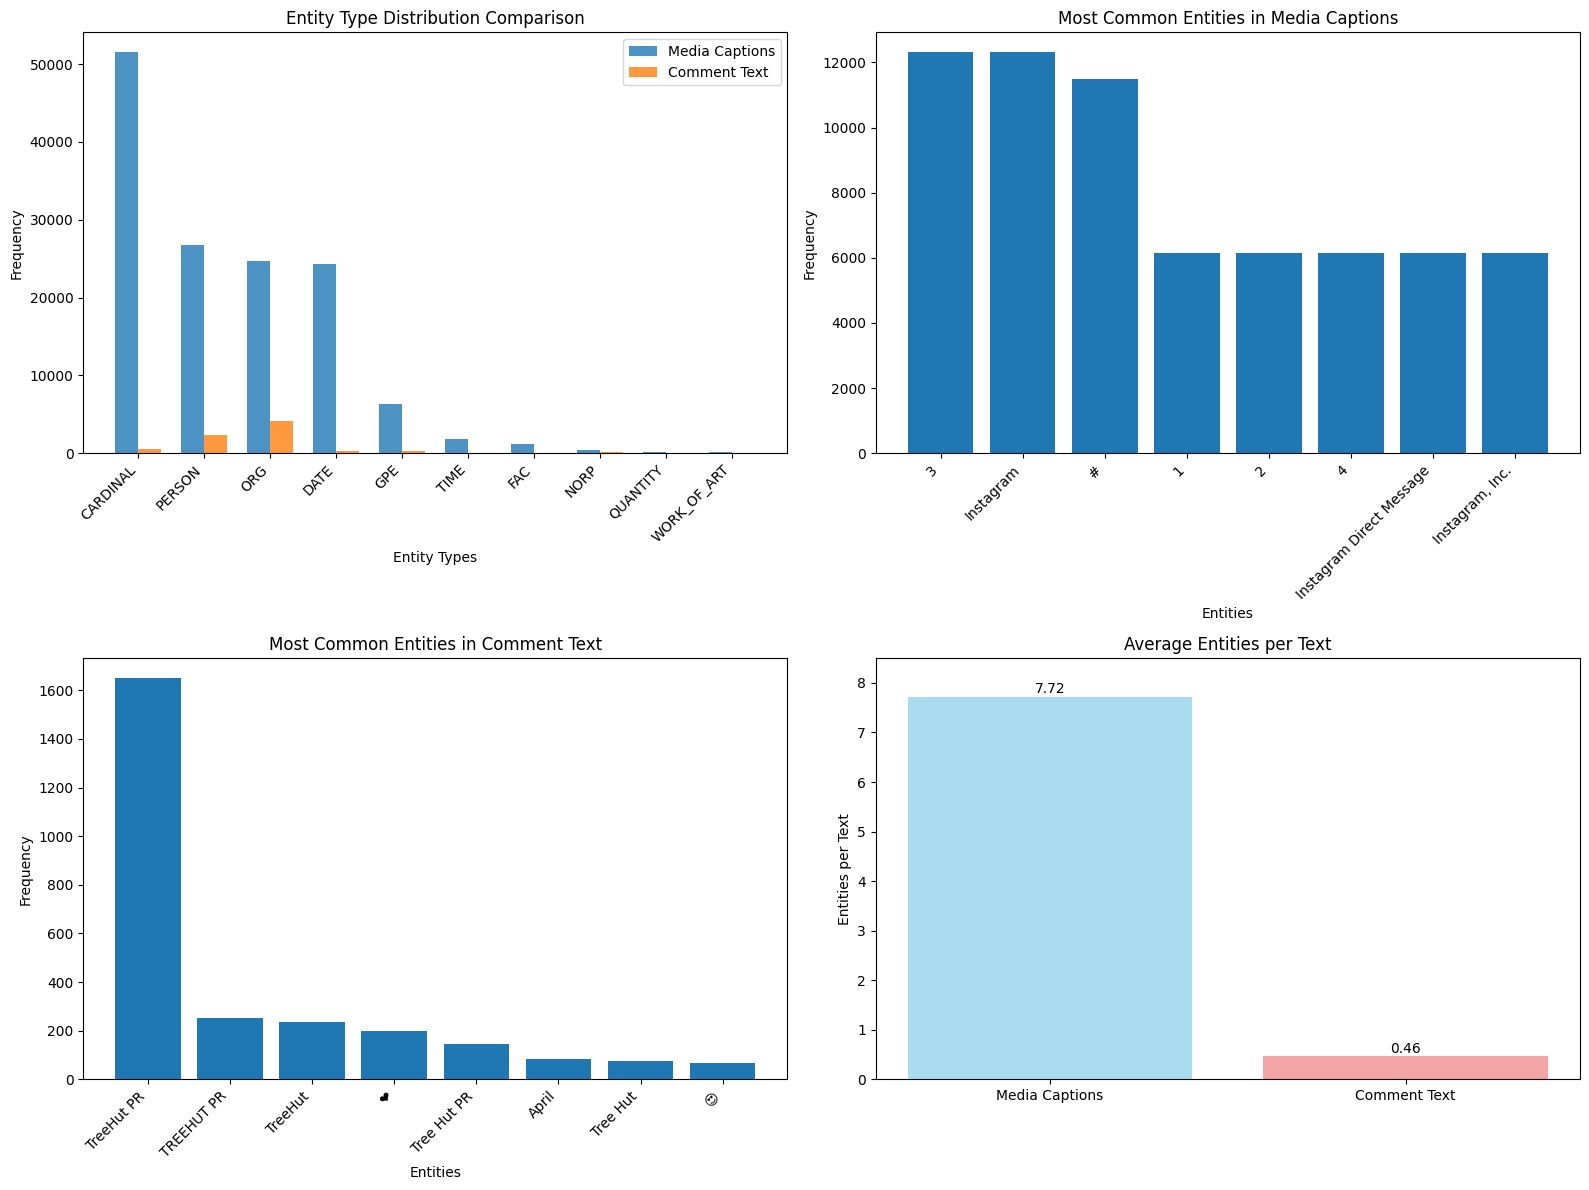


Entity Density Analysis:
Average entities per media caption: 7.72
Average entities per comment: 0.46
Ratio (media/comment): 16.61x


In [16]:
# NER Visualizations
print("\n" + "=" * 60)
print("NER VISUALIZATIONS")
print("=" * 60)

# Create comprehensive NER visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Entity types comparison
if media_type_counter and comment_type_counter:
    # Get all unique entity types
    all_types = set(media_type_counter.keys()) | set(comment_type_counter.keys())
    
    # Prepare data for comparison
    media_type_counts = [media_type_counter.get(t, 0) for t in all_types]
    comment_type_counts = [comment_type_counter.get(t, 0) for t in all_types]
    
    # Sort by media caption counts
    type_data = list(zip(all_types, media_type_counts, comment_type_counts))
    type_data.sort(key=lambda x: x[1], reverse=True)
    
    types, media_counts, comment_counts = zip(*type_data[:10])  # Top 10
    
    x = np.arange(len(types))
    width = 0.35
    
    ax1.bar(x - width/2, media_counts, width, label='Media Captions', alpha=0.8)
    ax1.bar(x + width/2, comment_counts, width, label='Comment Text', alpha=0.8)
    ax1.set_xlabel('Entity Types')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Entity Type Distribution Comparison')
    ax1.set_xticks(x)
    ax1.set_xticklabels(types, rotation=45, ha='right')
    ax1.legend()

# Most common entities in media captions
if media_entity_counter:
    top_media_entities = dict(media_entity_counter.most_common(8))
    ax2.bar(range(len(top_media_entities)), list(top_media_entities.values()))
    ax2.set_title('Most Common Entities in Media Captions')
    ax2.set_xlabel('Entities')
    ax2.set_ylabel('Frequency')
    ax2.set_xticks(range(len(top_media_entities)))
    ax2.set_xticklabels(list(top_media_entities.keys()), rotation=45, ha='right')

# Most common entities in comment text
if comment_entity_counter:
    top_comment_entities = dict(comment_entity_counter.most_common(8))
    ax3.bar(range(len(top_comment_entities)), list(top_comment_entities.values()))
    ax3.set_title('Most Common Entities in Comment Text')
    ax3.set_xlabel('Entities')
    ax3.set_ylabel('Frequency')
    ax3.set_xticks(range(len(top_comment_entities)))
    ax3.set_xticklabels(list(top_comment_entities.keys()), rotation=45, ha='right')

# Entity density comparison
media_density = sum(media_entity_counter.values()) / len(df[df['media_caption'].notna() & (df['media_caption'] != '')])
comment_density = sum(comment_entity_counter.values()) / len(df[df['comment_text'].notna() & (df['comment_text'] != '')])

categories = ['Media Captions', 'Comment Text']
densities = [media_density, comment_density]
colors = ['skyblue', 'lightcoral']

ax4.bar(categories, densities, color=colors, alpha=0.7)
ax4.set_title('Average Entities per Text')
ax4.set_ylabel('Entities per Text')
ax4.set_ylim(0, max(densities) * 1.1)

# Add value labels on bars
for i, v in enumerate(densities):
    ax4.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nEntity Density Analysis:")
print(f"Average entities per media caption: {media_density:.2f}")
print(f"Average entities per comment: {comment_density:.2f}")
print(f"Ratio (media/comment): {media_density/comment_density:.2f}x" if comment_density > 0 else "No entities in comments")


In [17]:
# Sentiment Analysis for Comments
print("=" * 60)
print("SENTIMENT ANALYSIS FOR COMMENTS")
print("=" * 60)

# Install required libraries if not already installed
try:
    from textblob import TextBlob
    print("TextBlob is available")
except ImportError:
    print("Installing TextBlob...")
    import subprocess
    subprocess.check_call(["pip", "install", "textblob"])
    from textblob import TextBlob

# Function to categorize sentiment into 5 categories
def categorize_sentiment(text):
    """
    Categorize sentiment into 5 categories: very negative, negative, neutral, positive, very positive
    Returns sentiment category and polarity score
    """
    if pd.isna(text) or text.strip() == '':
        return 'neutral', 0.0
    
    # Get sentiment using TextBlob
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity  # Range: -1 (very negative) to +1 (very positive)
    
    # Categorize into 5 categories
    if polarity <= -0.6:
        return 'very negative', polarity
    elif polarity <= -0.2:
        return 'negative', polarity
    elif polarity <= 0.2:
        return 'neutral', polarity
    elif polarity <= 0.6:
        return 'positive', polarity
    else:
        return 'very positive', polarity

# Test the function on sample comments
print("Testing sentiment analysis on sample comments:")
print("-" * 50)

sample_comments = [
    "I love this product! It's amazing!",
    "This is terrible, worst purchase ever",
    "It's okay, nothing special",
    "Absolutely fantastic! Best thing ever!",
    "I hate this so much, complete waste of money",
    "It's fine, works as expected",
    "Amazing quality, highly recommend!",
    "Pretty good, would buy again",
    "This is the worst thing I've ever seen",
    "Not bad, decent product"
]

for comment in sample_comments:
    category, polarity = categorize_sentiment(comment)
    print(f"'{comment}' -> {category} (polarity: {polarity:.2f})")


SENTIMENT ANALYSIS FOR COMMENTS
TextBlob is available
Testing sentiment analysis on sample comments:
--------------------------------------------------
'I love this product! It's amazing!' -> very positive (polarity: 0.69)
'This is terrible, worst purchase ever' -> very negative (polarity: -1.00)
'It's okay, nothing special' -> positive (polarity: 0.43)
'Absolutely fantastic! Best thing ever!' -> very positive (polarity: 0.75)
'I hate this so much, complete waste of money' -> negative (polarity: -0.30)
'It's fine, works as expected' -> neutral (polarity: 0.16)
'Amazing quality, highly recommend!' -> positive (polarity: 0.40)
'Pretty good, would buy again' -> positive (polarity: 0.47)
'This is the worst thing I've ever seen' -> very negative (polarity: -1.00)
'Not bad, decent product' -> positive (polarity: 0.26)


In [18]:
# Apply sentiment analysis to all comments
print("\nApplying sentiment analysis to all comments...")
print("-" * 50)

# Apply sentiment analysis to comment_text column
sentiment_results = []
polarity_scores = []

for i, comment in enumerate(df['comment_text']):
    category, polarity = categorize_sentiment(comment)
    sentiment_results.append(category)
    polarity_scores.append(polarity)
    
    # Show progress for first few examples
    if i < 10:
        print(f"Row {i}: '{str(comment)[:50]}...' -> {category} (polarity: {polarity:.2f})")

# Add results to dataframe
df['comment_sentiment'] = sentiment_results
df['comment_polarity'] = polarity_scores

print(f"\nProcessed {len(sentiment_results)} comments")
print(f"Comments with valid sentiment: {sum(1 for s in sentiment_results if s != 'neutral' or df['comment_text'].notna().sum())}")



Applying sentiment analysis to all comments...
--------------------------------------------------
Row 0: 'I bet this is good...' -> very positive (polarity: 0.70)
Row 1: 'i know this smells so good...' -> very positive (polarity: 0.70)
Row 2: 'Love it...' -> positive (polarity: 0.50)
Row 3: 'Please carry these in Canada! I miss them so much!...' -> positive (polarity: 0.25)
Row 4: 'I love it ..✌️...' -> positive (polarity: 0.50)
Row 5: 'Anndy Marin...' -> neutral (polarity: 0.00)
Row 6: 'Shaheena Juliet Castellano Flavors?🧐
I know you no...' -> neutral (polarity: 0.00)
Row 7: ''@brittany_lollar...' -> neutral (polarity: 0.00)
Row 8: 'Emerald...' -> neutral (polarity: 0.00)
Row 9: ''@kalwone...' -> neutral (polarity: 0.00)

Processed 17804 comments
Comments with valid sentiment: 17804


In [19]:
# Sentiment Analysis Summary Statistics
print("\n" + "=" * 60)
print("SENTIMENT ANALYSIS SUMMARY STATISTICS")
print("=" * 60)

from collections import Counter

# Get sentiment distribution
sentiment_counts = Counter(sentiment_results)
total_comments = len(sentiment_results)

print(f"\nSentiment Distribution:")
print("-" * 30)
for sentiment in ['very negative', 'negative', 'neutral', 'positive', 'very positive']:
    count = sentiment_counts.get(sentiment, 0)
    percentage = (count / total_comments) * 100
    print(f"{sentiment:15}: {count:6} ({percentage:5.1f}%)")

# Calculate additional statistics
print(f"\nAdditional Statistics:")
print("-" * 30)
print(f"Total comments analyzed: {total_comments}")
print(f"Average polarity score: {np.mean(polarity_scores):.3f}")
print(f"Median polarity score: {np.median(polarity_scores):.3f}")
print(f"Standard deviation: {np.std(polarity_scores):.3f}")

# Sentiment distribution by polarity ranges
print(f"\nPolarity Score Ranges:")
print("-" * 30)
very_negative = sum(1 for p in polarity_scores if p <= -0.6)
negative = sum(1 for p in polarity_scores if -0.6 < p <= -0.2)
neutral = sum(1 for p in polarity_scores if -0.2 < p <= 0.15)
positive = sum(1 for p in polarity_scores if 0.2 < p <= 0.6)
very_positive = sum(1 for p in polarity_scores if p > 0.6)

print(f"Very Negative (≤-0.6): {very_negative:6} ({(very_negative/total_comments)*100:5.1f}%)")
print(f"Negative (-0.6 to -0.2): {negative:6} ({(negative/total_comments)*100:5.1f}%)")
print(f"Neutral (-0.2 to 0.2): {neutral:6} ({(neutral/total_comments)*100:5.1f}%)")
print(f"Positive (0.2 to 0.6): {positive:6} ({(positive/total_comments)*100:5.1f}%)")
print(f"Very Positive (>0.6): {very_positive:6} ({(very_positive/total_comments)*100:5.1f}%)")



SENTIMENT ANALYSIS SUMMARY STATISTICS

Sentiment Distribution:
------------------------------
very negative  :     86 (  0.5%)
negative       :    160 (  0.9%)
neutral        :  15551 ( 87.3%)
positive       :   1242 (  7.0%)
very positive  :    765 (  4.3%)

Additional Statistics:
------------------------------
Total comments analyzed: 17804
Average polarity score: 0.059
Median polarity score: 0.000
Standard deviation: 0.208

Polarity Score Ranges:
------------------------------
Very Negative (≤-0.6):     86 (  0.5%)
Negative (-0.6 to -0.2):    160 (  0.9%)
Neutral (-0.2 to 0.2):  15371 ( 86.3%)
Positive (0.2 to 0.6):   1242 (  7.0%)
Very Positive (>0.6):    765 (  4.3%)



SENTIMENT ANALYSIS VISUALIZATIONS


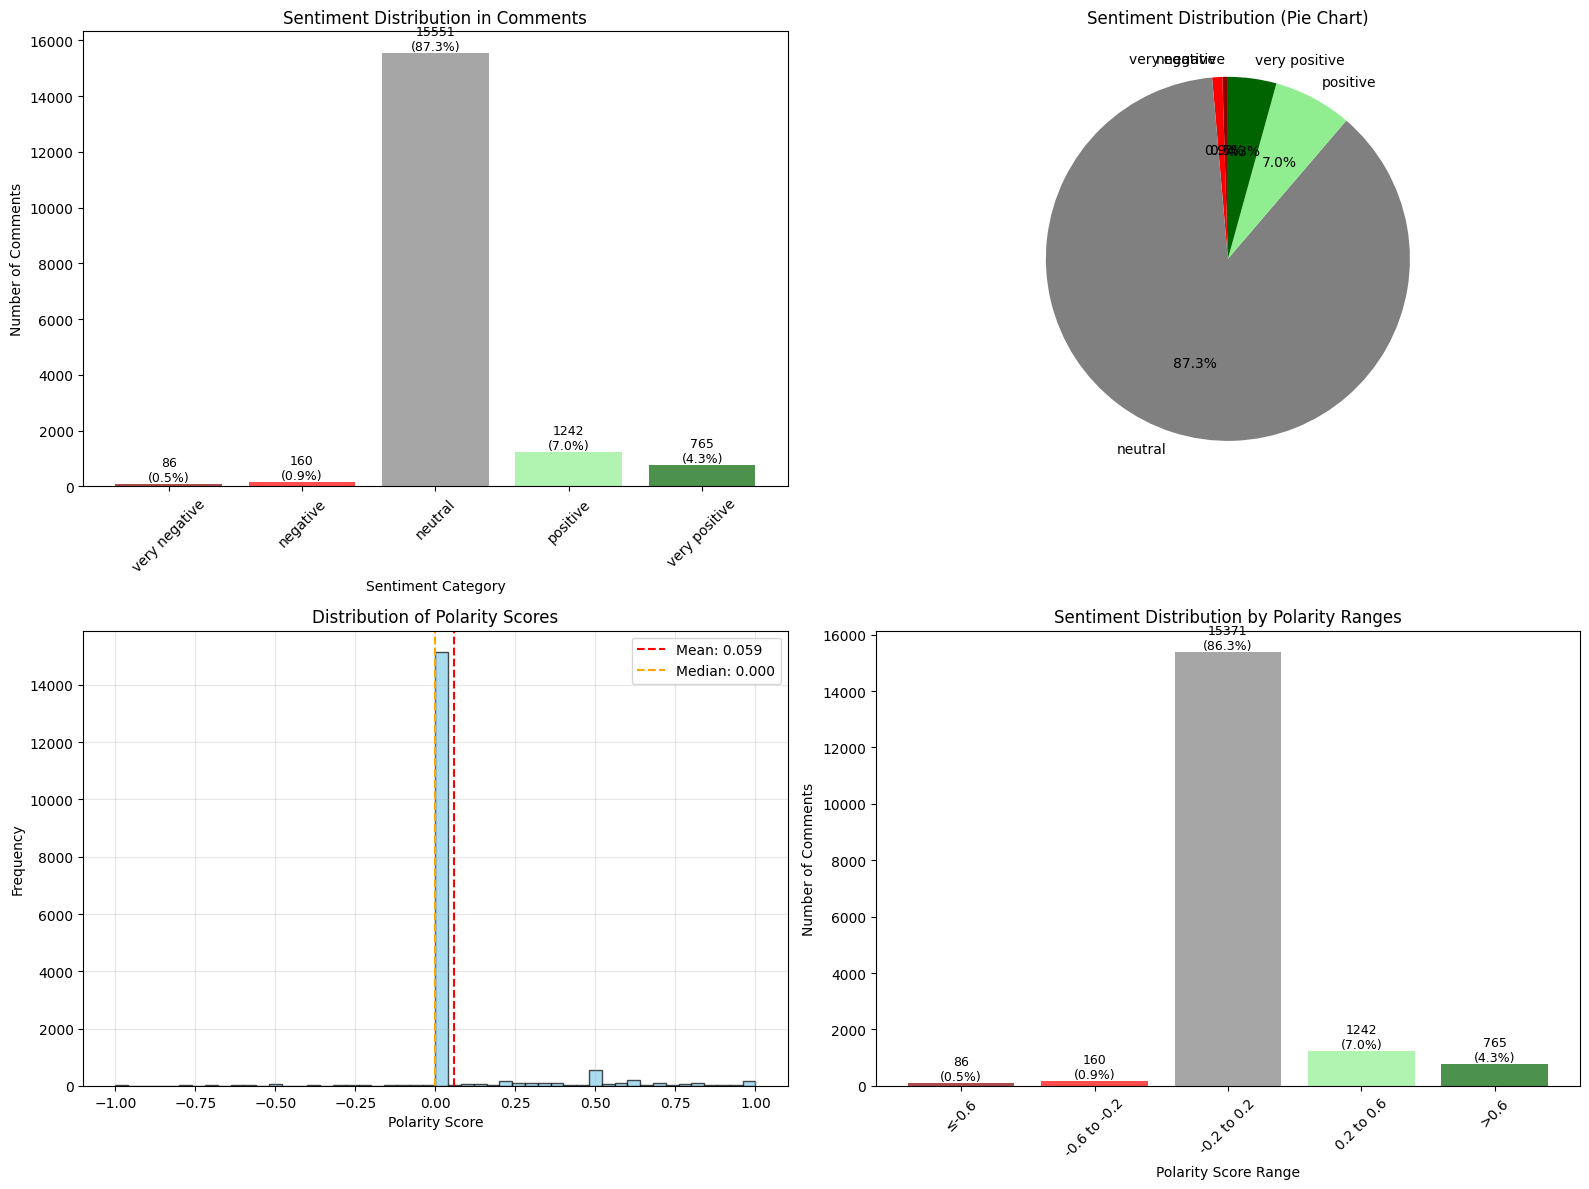


Sentiment Analysis Insights:
------------------------------
Overall positive sentiment: 2007 comments (11.3%)
Overall negative sentiment: 246 comments (1.4%)
Neutral sentiment: 15551 comments (87.3%)
Comments are generally positive (positive/negative ratio: 8.16)


In [20]:
# Sentiment Analysis Visualizations
print("\n" + "=" * 60)
print("SENTIMENT ANALYSIS VISUALIZATIONS")
print("=" * 60)

# Create comprehensive sentiment visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Sentiment Distribution Bar Chart
sentiment_order = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
sentiment_values = [sentiment_counts.get(s, 0) for s in sentiment_order]
colors = ['darkred', 'red', 'gray', 'lightgreen', 'darkgreen']

bars = ax1.bar(sentiment_order, sentiment_values, color=colors, alpha=0.7)
ax1.set_title('Sentiment Distribution in Comments')
ax1.set_xlabel('Sentiment Category')
ax1.set_ylabel('Number of Comments')
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, value in zip(bars, sentiment_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}\n({(value/total_comments)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9)

# 2. Sentiment Distribution Pie Chart
ax2.pie(sentiment_values, labels=sentiment_order, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Sentiment Distribution (Pie Chart)')

# 3. Polarity Score Histogram
ax3.hist(polarity_scores, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax3.axvline(np.mean(polarity_scores), color='red', linestyle='--', label=f'Mean: {np.mean(polarity_scores):.3f}')
ax3.axvline(np.median(polarity_scores), color='orange', linestyle='--', label=f'Median: {np.median(polarity_scores):.3f}')
ax3.set_title('Distribution of Polarity Scores')
ax3.set_xlabel('Polarity Score')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Sentiment Categories with Polarity Ranges
polarity_ranges = ['≤-0.6', '-0.6 to -0.2', '-0.2 to 0.2', '0.2 to 0.6', '>0.6']
range_values = [very_negative, negative, neutral, positive, very_positive]

bars = ax4.bar(polarity_ranges, range_values, color=colors, alpha=0.7)
ax4.set_title('Sentiment Distribution by Polarity Ranges')
ax4.set_xlabel('Polarity Score Range')
ax4.set_ylabel('Number of Comments')
ax4.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, value in zip(bars, range_values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}\n({(value/total_comments)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nSentiment Analysis Insights:")
print("-" * 30)
positive_sentiments = sentiment_counts.get('positive', 0) + sentiment_counts.get('very positive', 0)
negative_sentiments = sentiment_counts.get('negative', 0) + sentiment_counts.get('very negative', 0)
neutral_sentiments = sentiment_counts.get('neutral', 0)

print(f"Overall positive sentiment: {positive_sentiments} comments ({(positive_sentiments/total_comments)*100:.1f}%)")
print(f"Overall negative sentiment: {negative_sentiments} comments ({(negative_sentiments/total_comments)*100:.1f}%)")
print(f"Neutral sentiment: {neutral_sentiments} comments ({(neutral_sentiments/total_comments)*100:.1f}%)")

if positive_sentiments > negative_sentiments:
    print(f"Comments are generally positive (positive/negative ratio: {positive_sentiments/negative_sentiments:.2f})")
elif negative_sentiments > positive_sentiments:
    print(f"Comments are generally negative (negative/positive ratio: {negative_sentiments/positive_sentiments:.2f})")
else:
    print("Comments are balanced between positive and negative sentiment")


In [21]:
df.head()

,timestamp,media_id,media_caption,comment_text,media_caption_pos,comment_text_pos,media_caption_ner,comment_text_ner,comment_sentiment,comment_polarity
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,"[(Soft, ADJ), (skin, NOUN), (,, PUNCT), (soft,...","[(I, PRON), (bet, VERB), (this, PRON), (is, AU...",[],[],very positive,0.70
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good,"[(Why, SCONJ), (use, VERB), (one, NUM), (scrub...","[(i, PRON), (know, VERB), (this, PRON), (smell...","[(one, CARDINAL), (#, CARDINAL)]",[],very positive,0.70
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it,"[(Morning, PROPN), (routine, NOUN), (with, ADP...","[(Love, VERB), (it, PRON)]","[(Morning, TIME), (Tree Hut, ORG)]",[],positive,0.50
3,2025-03-01 00:41:59.467000+00:00,1098364052333950,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...,"[(Why, SCONJ), (use, VERB), (one, NUM), (scrub...","[(Please, INTJ), (carry, VERB), (these, PRON),...","[(one, CARDINAL)]","[(Canada, GPE)]",positive,0.25
4,2025-03-01 02:21:29.715000+00:00,1083943630442659,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️,"[(Vanilla, PROPN), (Serum, PROPN), (-, PUNCT),...","[(I, PRON), (love, VERB), (it, PRON), (.., PUN...","[(Vanilla Serum-Infused Hand Wash, PERSON)]",[],positive,0.50


In [22]:
# Sentiment Analysis for Media Captions
print("=" * 60)
print("SENTIMENT ANALYSIS FOR MEDIA CAPTIONS")
print("=" * 60)

# Apply sentiment analysis to media captions using the same function
print("Applying sentiment analysis to media captions...")
print("-" * 50)

# Apply sentiment analysis to media_caption column
media_sentiment_results = []
media_polarity_scores = []

for i, caption in enumerate(df['media_caption']):
    category, polarity = categorize_sentiment(caption)
    media_sentiment_results.append(category)
    media_polarity_scores.append(polarity)
    
    # Show progress for first few examples
    if i < 10:
        print(f"Row {i}: '{str(caption)[:50]}...' -> {category} (polarity: {polarity:.2f})")

# Add results to dataframe
df['media_caption_sentiment'] = media_sentiment_results
df['media_caption_polarity'] = media_polarity_scores

print(f"\nProcessed {len(media_sentiment_results)} media captions")
print(f"Captions with valid sentiment: {sum(1 for s in media_sentiment_results if s != 'neutral' or df['media_caption'].notna().sum())}")


SENTIMENT ANALYSIS FOR MEDIA CAPTIONS
Applying sentiment analysis to media captions...
--------------------------------------------------
Row 0: 'Soft skin, soft life 🩷🌸🫧 get your hands on this se...' -> neutral (polarity: 0.11)
Row 1: 'Why use one scrub when you can use them all at onc...' -> neutral (polarity: 0.00)
Row 2: 'Morning routine with Tree Hut 🍊🫧 Now available onl...' -> positive (polarity: 0.50)
Row 3: 'Why use one scrub when you can use them all at onc...' -> neutral (polarity: 0.00)
Row 4: 'Vanilla Serum-Infused Hand Wash: A sweet escape fo...' -> neutral (polarity: 0.14)
Row 5: 'My go-to for waking up my skin! 🍊🫧 Click the link ...' -> neutral (polarity: 0.00)
Row 6: 'My go-to for waking up my skin! 🍊🫧 Click the link ...' -> neutral (polarity: 0.00)
Row 7: 'Orange you glad it’s giveaway time?! 🍊✨

That’s ri...' -> positive (polarity: 0.27)
Row 8: 'Which WintHER scrub fits your vibe✨...' -> neutral (polarity: 0.00)
Row 9: 'Orange you glad it’s giveaway time?! 🍊✨

That’s 

In [23]:
# Media Caption Sentiment Summary Statistics
print("\n" + "=" * 60)
print("MEDIA CAPTION SENTIMENT SUMMARY STATISTICS")
print("=" * 60)

# Get media caption sentiment distribution
media_sentiment_counts = Counter(media_sentiment_results)
total_captions = len(media_sentiment_results)

print(f"\nMedia Caption Sentiment Distribution:")
print("-" * 40)
for sentiment in ['very negative', 'negative', 'neutral', 'positive', 'very positive']:
    count = media_sentiment_counts.get(sentiment, 0)
    percentage = (count / total_captions) * 100
    print(f"{sentiment:15}: {count:6} ({percentage:5.1f}%)")

# Calculate additional statistics
print(f"\nMedia Caption Sentiment Statistics:")
print("-" * 40)
print(f"Total captions analyzed: {total_captions}")
print(f"Average polarity score: {np.mean(media_polarity_scores):.3f}")
print(f"Median polarity score: {np.median(media_polarity_scores):.3f}")
print(f"Standard deviation: {np.std(media_polarity_scores):.3f}")

# Sentiment distribution by polarity ranges
print(f"\nMedia Caption Polarity Score Ranges:")
print("-" * 40)
media_very_negative = sum(1 for p in media_polarity_scores if p <= -0.6)
media_negative = sum(1 for p in media_polarity_scores if -0.6 < p <= -0.15)
media_neutral = sum(1 for p in media_polarity_scores if -0.15 < p <= 0.15)
media_positive = sum(1 for p in media_polarity_scores if 0.15 < p <= 0.6)
media_very_positive = sum(1 for p in media_polarity_scores if p > 0.6)

print(f"Very Negative (≤-0.6): {media_very_negative:6} ({(media_very_negative/total_captions)*100:5.1f}%)")
print(f"Negative (-0.6 to -0.15): {media_negative:6} ({(media_negative/total_captions)*100:5.1f}%)")
print(f"Neutral (-0.15 to 0.15): {media_neutral:6} ({(media_neutral/total_captions)*100:5.1f}%)")
print(f"Positive (0.15 to 0.6): {media_positive:6} ({(media_positive/total_captions)*100:5.1f}%)")
print(f"Very Positive (>0.6): {media_very_positive:6} ({(media_very_positive/total_captions)*100:5.1f}%)")



MEDIA CAPTION SENTIMENT SUMMARY STATISTICS

Media Caption Sentiment Distribution:
----------------------------------------
very negative  :    132 (  0.7%)
negative       :     14 (  0.1%)
neutral        :  12172 ( 68.4%)
positive       :   5075 ( 28.5%)
very positive  :    411 (  2.3%)

Media Caption Sentiment Statistics:
----------------------------------------
Total captions analyzed: 17804
Average polarity score: 0.102
Median polarity score: 0.051
Standard deviation: 0.194

Media Caption Polarity Score Ranges:
----------------------------------------
Very Negative (≤-0.6):    132 (  0.7%)
Negative (-0.6 to -0.15):     42 (  0.2%)
Neutral (-0.15 to 0.15):  10945 ( 61.5%)
Positive (0.15 to 0.6):   6274 ( 35.2%)
Very Positive (>0.6):    411 (  2.3%)



COMPARATIVE SENTIMENT ANALYSIS VISUALIZATIONS


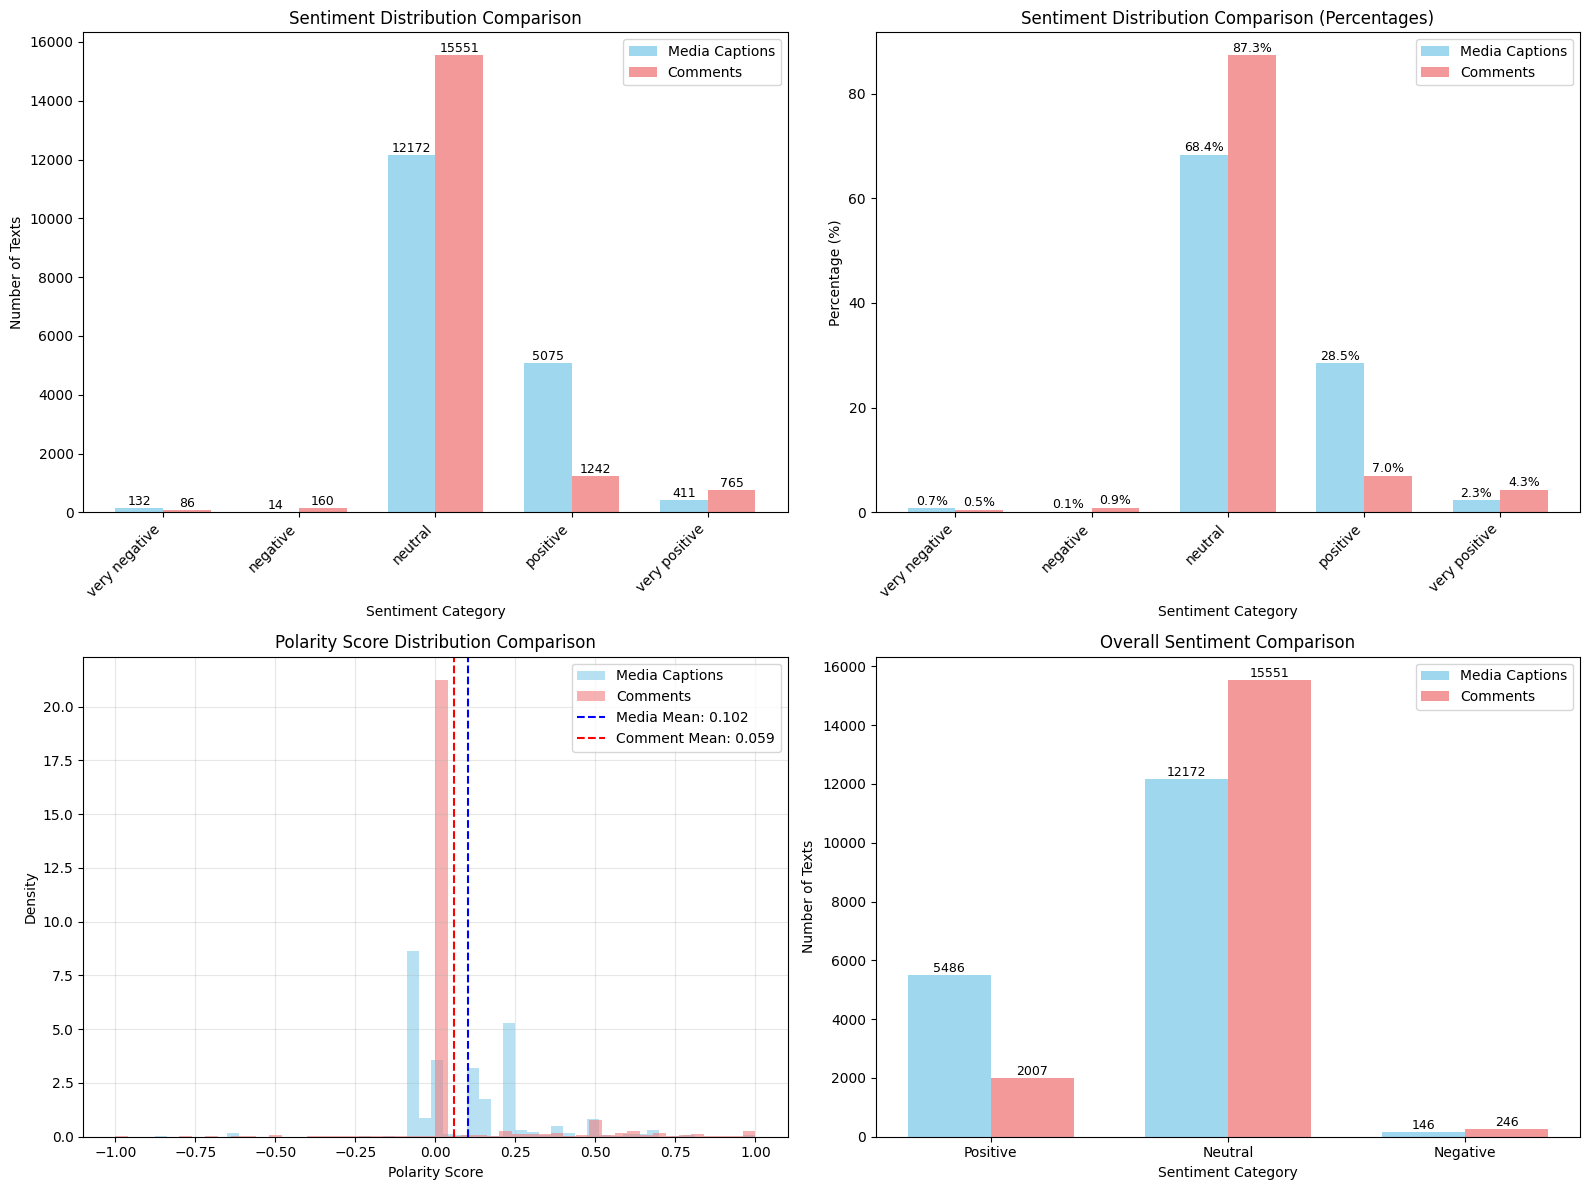


Comparative Sentiment Analysis Insights:
--------------------------------------------------
Media Caption Sentiment:
  Positive: 5486 (30.8%)
  Neutral: 12172 (68.4%)
  Negative: 146 (0.8%)

Comment Sentiment:
  Positive: 2007 (11.3%)
  Neutral: 15551 (87.3%)
  Negative: 246 (1.4%)

Key Differences:
  Media captions are more positive: 19.5 percentage points
  Comments are more neutral: 19.0 percentage points
  Average polarity - Media: 0.102, Comments: 0.059


In [24]:
# Comparative Sentiment Analysis Visualizations
print("\n" + "=" * 60)
print("COMPARATIVE SENTIMENT ANALYSIS VISUALIZATIONS")
print("=" * 60)

# Create comprehensive comparison visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Side-by-side sentiment distribution comparison
sentiment_order = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
media_values = [media_sentiment_counts.get(s, 0) for s in sentiment_order]
comment_values = [sentiment_counts.get(s, 0) for s in sentiment_order]

x = np.arange(len(sentiment_order))
width = 0.35

bars1 = ax1.bar(x - width/2, media_values, width, label='Media Captions', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x + width/2, comment_values, width, label='Comments', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Sentiment Category')
ax1.set_ylabel('Number of Texts')
ax1.set_title('Sentiment Distribution Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(sentiment_order, rotation=45, ha='right')
ax1.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 2. Percentage comparison
media_percentages = [(count/total_captions)*100 for count in media_values]
comment_percentages = [(count/total_comments)*100 for count in comment_values]

bars1 = ax2.bar(x - width/2, media_percentages, width, label='Media Captions', alpha=0.8, color='skyblue')
bars2 = ax2.bar(x + width/2, comment_percentages, width, label='Comments', alpha=0.8, color='lightcoral')

ax2.set_xlabel('Sentiment Category')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Sentiment Distribution Comparison (Percentages)')
ax2.set_xticks(x)
ax2.set_xticklabels(sentiment_order, rotation=45, ha='right')
ax2.legend()

# Add percentage labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# 3. Polarity score distribution comparison
ax3.hist(media_polarity_scores, bins=50, alpha=0.6, label='Media Captions', color='skyblue', density=True)
ax3.hist(polarity_scores, bins=50, alpha=0.6, label='Comments', color='lightcoral', density=True)
ax3.axvline(np.mean(media_polarity_scores), color='blue', linestyle='--', label=f'Media Mean: {np.mean(media_polarity_scores):.3f}')
ax3.axvline(np.mean(polarity_scores), color='red', linestyle='--', label=f'Comment Mean: {np.mean(polarity_scores):.3f}')
ax3.set_xlabel('Polarity Score')
ax3.set_ylabel('Density')
ax3.set_title('Polarity Score Distribution Comparison')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Sentiment intensity comparison (positive vs negative)
media_positive_total = media_sentiment_counts.get('positive', 0) + media_sentiment_counts.get('very positive', 0)
media_negative_total = media_sentiment_counts.get('negative', 0) + media_sentiment_counts.get('very negative', 0)
media_neutral_total = media_sentiment_counts.get('neutral', 0)

comment_positive_total = sentiment_counts.get('positive', 0) + sentiment_counts.get('very positive', 0)
comment_negative_total = sentiment_counts.get('negative', 0) + sentiment_counts.get('very negative', 0)
comment_neutral_total = sentiment_counts.get('neutral', 0)

categories = ['Positive', 'Neutral', 'Negative']
media_sentiment_totals = [media_positive_total, media_neutral_total, media_negative_total]
comment_sentiment_totals = [comment_positive_total, comment_neutral_total, comment_negative_total]

x = np.arange(len(categories))
bars1 = ax4.bar(x - width/2, media_sentiment_totals, width, label='Media Captions', alpha=0.8, color='skyblue')
bars2 = ax4.bar(x + width/2, comment_sentiment_totals, width, label='Comments', alpha=0.8, color='lightcoral')

ax4.set_xlabel('Sentiment Category')
ax4.set_ylabel('Number of Texts')
ax4.set_title('Overall Sentiment Comparison')
ax4.set_xticks(x)
ax4.set_xticklabels(categories)
ax4.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Comparative insights
print(f"\nComparative Sentiment Analysis Insights:")
print("-" * 50)
print(f"Media Caption Sentiment:")
print(f"  Positive: {media_positive_total} ({(media_positive_total/total_captions)*100:.1f}%)")
print(f"  Neutral: {media_neutral_total} ({(media_neutral_total/total_captions)*100:.1f}%)")
print(f"  Negative: {media_negative_total} ({(media_negative_total/total_captions)*100:.1f}%)")

print(f"\nComment Sentiment:")
print(f"  Positive: {comment_positive_total} ({(comment_positive_total/total_comments)*100:.1f}%)")
print(f"  Neutral: {comment_neutral_total} ({(comment_neutral_total/total_comments)*100:.1f}%)")
print(f"  Negative: {comment_negative_total} ({(comment_negative_total/total_comments)*100:.1f}%)")

print(f"\nKey Differences:")
print(f"  Media captions are more positive: {((media_positive_total/total_captions) - (comment_positive_total/total_comments))*100:.1f} percentage points")
print(f"  Comments are more neutral: {((comment_neutral_total/total_comments) - (media_neutral_total/total_captions))*100:.1f} percentage points")
print(f"  Average polarity - Media: {np.mean(media_polarity_scores):.3f}, Comments: {np.mean(polarity_scores):.3f}")


In [25]:
# Examples of Media Caption Sentiment Analysis
print("\n" + "=" * 60)
print("EXAMPLES OF MEDIA CAPTION SENTIMENT ANALYSIS")
print("=" * 60)

# Show examples for each sentiment category
def show_media_sentiment_examples(sentiment_category, n_examples=5):
    """Show examples of media captions for a specific sentiment category"""
    examples = df[df['media_caption_sentiment'] == sentiment_category]['media_caption'].head(n_examples)
    print(f"\n{sentiment_category.upper()} Media Caption Examples:")
    print("-" * 50)
    for i, caption in enumerate(examples, 1):
        polarity = df[df['media_caption'] == caption]['media_caption_polarity'].iloc[0]
        print(f"{i}. '{caption}' (polarity: {polarity:.2f})")

# Show examples for each sentiment category
for sentiment in ['very negative', 'negative', 'neutral', 'positive', 'very positive']:
    show_media_sentiment_examples(sentiment)

# Show some interesting patterns
print(f"\n" + "=" * 60)
print("MEDIA CAPTION SENTIMENT PATTERNS")
print("=" * 60)

# Media captions with highest and lowest polarity
print("\nMost Positive Media Captions:")
print("-" * 40)
most_positive_media = df.nlargest(3, 'media_caption_polarity')[['media_caption', 'media_caption_polarity', 'media_caption_sentiment']]
for idx, row in most_positive_media.iterrows():
    print(f"Polarity: {row['media_caption_polarity']:.2f} | {row['media_caption_sentiment']} | '{row['media_caption']}'")

print("\nMost Negative Media Captions:")
print("-" * 40)
most_negative_media = df.nsmallest(3, 'media_caption_polarity')[['media_caption', 'media_caption_polarity', 'media_caption_sentiment']]
for idx, row in most_negative_media.iterrows():
    print(f"Polarity: {row['media_caption_polarity']:.2f} | {row['media_caption_sentiment']} | '{row['media_caption']}'")

# Sentiment by caption length
print(f"\nMedia Caption Sentiment by Length:")
print("-" * 40)
df['media_caption_length'] = df['media_caption'].str.len()
short_captions = df[df['media_caption_length'] <= 50]
medium_captions = df[(df['media_caption_length'] > 50) & (df['media_caption_length'] <= 150)]
long_captions = df[df['media_caption_length'] > 150]

for length_cat, subset in [("Short (≤50 chars)", short_captions), 
                          ("Medium (51-150 chars)", medium_captions), 
                          ("Long (>150 chars)", long_captions)]:
    if len(subset) > 0:
        avg_polarity = subset['media_caption_polarity'].mean()
        most_common_sentiment = subset['media_caption_sentiment'].mode().iloc[0] if len(subset) > 0 else "N/A"
        print(f"{length_cat:20}: Avg polarity: {avg_polarity:.3f}, Most common: {most_common_sentiment}")

# Sentiment correlation analysis
print(f"\n" + "=" * 60)
print("SENTIMENT CORRELATION ANALYSIS")
print("=" * 60)

# Compare media caption sentiment with comment sentiment for the same posts
print("\nSentiment Alignment Analysis:")
print("-" * 40)
sentiment_alignment = df.groupby(['media_caption_sentiment', 'comment_sentiment']).size().unstack(fill_value=0)
print("Media Caption vs Comment Sentiment Cross-tabulation:")
print(sentiment_alignment)

# Calculate correlation between media caption and comment sentiment
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['media_caption_polarity'], df['comment_polarity'])
print(f"\nPolarity Correlation: {correlation:.3f} (p-value: {p_value:.3f})")

print(f"\n" + "=" * 60)
print("MEDIA CAPTION SENTIMENT ANALYSIS COMPLETE")
print("=" * 60)
print("Summary:")
print(f"- Added 'media_caption_sentiment' column with 5 sentiment categories")
print(f"- Added 'media_caption_polarity' column with numerical polarity scores")
print(f"- Created comprehensive statistics and visualizations")
print(f"- Analyzed sentiment patterns and correlations with comments")
print(f"- Compared media caption sentiment with comment sentiment")



EXAMPLES OF MEDIA CAPTION SENTIMENT ANALYSIS

VERY NEGATIVE Media Caption Examples:
--------------------------------------------------
1. 'Drop a 🪷 if you're obsessed with Lotus Water!' (polarity: -0.62)
2. 'Drop a 🪷 if you're obsessed with Lotus Water!' (polarity: -0.62)
3. 'Drop a 🪷 if you're obsessed with Lotus Water!' (polarity: -0.62)
4. 'Drop a 🪷 if you're obsessed with Lotus Water!' (polarity: -0.62)
5. 'Drop a 🪷 if you're obsessed with Lotus Water!' (polarity: -0.62)

NEGATIVE Media Caption Examples:
--------------------------------------------------
1. 'When I say I’m walking into @target for a few things… these are the few things I’m talking about💅

📸:@leahjane
Want to be featured on our page? 🌟 Tag us in your photos or videos using our products, and you might just see yourself glowing on our feed! 💅
#treehut #treehutcollection #newness #target #selfcare' (polarity: -0.23)
2. 'When I say I’m walking into @target for a few things… these are the few things I’m talking about💅



In [26]:
# Save Processed Dataframe
print("=" * 60)
print("SAVING PROCESSED DATAFRAME")
print("=" * 60)

# Create interim directory if it doesn't exist
import os
os.makedirs('../data/interim', exist_ok=True)

# Save the processed dataframe with all new columns
output_file = '../data/interim/processed_engagements_with_sentiment.csv'
df.to_csv(output_file, index=False)

print(f"Dataframe saved to: {output_file}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Show summary of what was added
print(f"\nNew columns added during processing:")
print("-" * 40)
new_columns = [
    'media_caption_pos', 'comment_text_pos',
    'media_caption_ner', 'comment_text_ner', 
    'comment_sentiment', 'comment_polarity',
    'media_caption_sentiment', 'media_caption_polarity',
    'comment_length', 'media_caption_length'
]

for col in new_columns:
    if col in df.columns:
        print(f"✓ {col}")

print(f"\nData processing complete!")
print(f"Total records: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"File size: {os.path.getsize(output_file) / (1024*1024):.2f} MB")


SAVING PROCESSED DATAFRAME
Dataframe saved to: ../data/interim/processed_engagements_with_sentiment.csv
Shape: (17804, 13)
Columns: ['timestamp', 'media_id', 'media_caption', 'comment_text', 'media_caption_pos', 'comment_text_pos', 'media_caption_ner', 'comment_text_ner', 'comment_sentiment', 'comment_polarity', 'media_caption_sentiment', 'media_caption_polarity', 'media_caption_length']

New columns added during processing:
----------------------------------------
✓ media_caption_pos
✓ comment_text_pos
✓ media_caption_ner
✓ comment_text_ner
✓ comment_sentiment
✓ comment_polarity
✓ media_caption_sentiment
✓ media_caption_polarity
✓ media_caption_length

Data processing complete!
Total records: 17804
Total columns: 13
File size: 38.70 MB
